# Dataframes

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

## Creación de Dataframes
Se pueden crear Dataframes a partir de diversas fuentes:
### A partir de un RDD
toDF()

In [2]:
df =spark.range(50).toDF("number")
df.show()

+------+
|number|
+------+
|     0|
|     1|
|     2|
|     3|
|     4|
|     5|
|     6|
|     7|
|     8|
|     9|
|    10|
|    11|
|    12|
|    13|
|    14|
|    15|
|    16|
|    17|
|    18|
|    19|
+------+
only showing top 20 rows



### A partir de un archivo
- json

In [3]:
df2 = spark.read.json("data/flight-data/json/2010-summary.json")
df2.show()
df2.printSchema()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

- csv:

In [4]:
df_csv = spark.read.option("header", True).csv('data/flight-data/csv/2015-summary.csv')
df_csv.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows



- parquet

In [5]:
df_parquet = spark.read.parquet("data/flight-data/parquet/2010-summary.parquet")
df_parquet.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
|    United States|          Singapore|   25|
|    United States|            Grenada|   54|
|       Costa Rica|      United States|  477|
|          Senegal|      United States|   29|
|    United States|   Marshall Islands|   44|
+-----------------+-------------------+-----+
only showing top 10 rows



## Persistencia de datos
No funciona en Jupyter por problemas de permisos

In [6]:

# df_csv.write.csv("salida/datos.csv", header= True, mode="overwrite")
# df_csv.write.json("salida/datos.json", mode="overwrite"

## Transformacioness
A continuación vamos a ver algunas de las principales transformaciones permitidas para Dataframes
### select
Permiten hacer una operación equivalente al select de las BBDDR. Dos variantes:
- **select**


In [7]:
df_csv.select("DEST_COUNTRY_NAME").show(5)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
|    United States|
|            Egypt|
|    United States|
+-----------------+
only showing top 5 rows



Podemos usar lal función **expr** para diversas acciones, por ejemplo, usar alias

In [8]:
from pyspark.sql.functions import expr, col, column
df_csv.select(expr("DEST_COUNTRY_NAME AS destination")).show(5)

+-------------+
|  destination|
+-------------+
|United States|
|United States|
|United States|
|        Egypt|
|United States|
+-------------+
only showing top 5 rows



- **selectExpr**:
Permite añadir expresiones de una forma más sencilla. Podemos hacer operaciones sencillas como usar alias (1) u operaciones más complejas como añadir columnas (2) 

In [9]:
# 1:
df_csv.selectExpr("DEST_COUNTRY_NAME AS Destino", "ORIGIN_COUNTRY_NAME AS Origen").show(5)
# 2:
df_csv.selectExpr("*", "(DEST_COUNTRY_NAME = ORIGIN_COUNTRY_NAME) AS withinCountry").show(5)

+-------------+-------------+
|      Destino|       Origen|
+-------------+-------------+
|United States|      Romania|
|United States|      Croatia|
|United States|      Ireland|
|        Egypt|United States|
|United States|        India|
+-------------+-------------+
only showing top 5 rows

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
|    United States|            Ireland|  344|        false|
|            Egypt|      United States|   15|        false|
|    United States|              India|   62|        false|
+-----------------+-------------------+-----+-------------+
only showing top 5 rows



### Añadir columnas
Sin embargo, para añadir columnas puede ser más sencillo el método **withColumn**

In [10]:
df_csv.withColumn("withinCountry", expr("ORIGIN_COUNTRY_NAME = DEST_COUNTRY_NAME")).show(5)

+-----------------+-------------------+-----+-------------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withinCountry|
+-----------------+-------------------+-----+-------------+
|    United States|            Romania|   15|        false|
|    United States|            Croatia|    1|        false|
|    United States|            Ireland|  344|        false|
|            Egypt|      United States|   15|        false|
|    United States|              India|   62|        false|
+-----------------+-------------------+-----+-------------+
only showing top 5 rows



### Renombrar columnas
De la misma forma, **withColumnRenamed** permite usar alias de forma más directa

In [11]:
df_csv.withColumnRenamed("DEST_COUNTRY_NAME","dest").show(5)

+-------------+-------------------+-----+
|         dest|ORIGIN_COUNTRY_NAME|count|
+-------------+-------------------+-----+
|United States|            Romania|   15|
|United States|            Croatia|    1|
|United States|            Ireland|  344|
|        Egypt|      United States|   15|
|United States|              India|   62|
+-------------+-------------------+-----+
only showing top 5 rows



### Eliminar columnas
La función **drop** permite eliminar una columna

In [12]:
df_csv.drop("ORIGIN_COUNTRY_NAME").show(5)

+-----------------+-----+
|DEST_COUNTRY_NAME|count|
+-----------------+-----+
|    United States|   15|
|    United States|    1|
|    United States|  344|
|            Egypt|   15|
|    United States|   62|
+-----------------+-----+
only showing top 5 rows



### Filtrar columnas
Las funciones **where/filter** permiten filtrar el DF por un criterio, de forma similar a la cláusula Where de SQL

In [13]:
df_csv.filter("DEST_COUNTRY_NAME = 'United States' AND count < 5").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|    United States|          Gibraltar|    1|
|    United States|             Cyprus|    1|
|    United States|           Malaysia|    3|
+-----------------+-------------------+-----+
only showing top 5 rows



### Obtener filas únicas
La función **distinct** permite elminar duplicados

In [14]:
df_csv.select("ORIGIN_COUNTRY_NAME","DEST_COUNTRY_NAME").distinct().show(5)

+-------------------+-----------------+
|ORIGIN_COUNTRY_NAME|DEST_COUNTRY_NAME|
+-------------------+-----------------+
|            Romania|    United States|
|            Croatia|    United States|
|            Ireland|    United States|
|      United States|            Egypt|
|              India|    United States|
+-------------------+-----------------+
only showing top 5 rows



### Ordenando filas
Con **sort** podemos ordenar el DF en función de la columna especificada. Las funciones **asc** y **desc** nos permiten especificar el sentido de la ordenación (por defecto ascendente)


In [15]:
df_csv.sort("count").show(5)

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|          Gibraltar|    1|
|       United States|             Cyprus|    1|
|Saint Vincent and...|      United States|    1|
|       United States|          Singapore|    1|
|             Moldova|      United States|    1|
+--------------------+-------------------+-----+
only showing top 5 rows



In [16]:
from pyspark.sql.functions import desc, asc
df_csv.sort(col('count').desc(), col('ORIGIN_COUNTRY_NAME').asc()).show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|        The Bahamas|  986|
|      The Bahamas|      United States|  955|
|    United States|             France|  952|
|           France|      United States|  935|
|    United States|              China|  920|
+-----------------+-------------------+-----+
only showing top 5 rows



### Agregaciones
Spark permite el uso de diversas funciones de agregación con *Dataframes*. A continuación, algunas de las más importantes:

#### count: podemos usarla de tres formas:
- Especificanco una columna
- Especificando todas las columnas (*)
- Contar todas las filas como un literal (1)

In [17]:
from pyspark.sql.functions import count
df_csv.select(count("ORIGIN_COUNTRY_NAME")).show(5)

df_csv.select(count("*")).show()

#df_csv.select(count(1)).show()

+--------------------------+
|count(ORIGIN_COUNTRY_NAME)|
+--------------------------+
|                       256|
+--------------------------+

+--------+
|count(1)|
+--------+
|     256|
+--------+



#### countDistinct: 
Cuenta el número de ocurrencias distintas de una columna

In [18]:
from pyspark.sql.functions import countDistinct
df_csv.select(countDistinct("DEST_COUNTRY_NAME")).show()

+---------------------------------+
|count(DISTINCT DEST_COUNTRY_NAME)|
+---------------------------------+
|                              132|
+---------------------------------+



#### approx_count_distinct
Al trabajar con grandes conjuntos de datos puede interesar una aproximación

In [19]:
from pyspark.sql.functions import approx_count_distinct
df_csv.select(approx_count_distinct("DEST_COUNTRY_NAME",0.1)).show()

+----------------------------------------+
|approx_count_distinct(DEST_COUNTRY_NAME)|
+----------------------------------------+
|                                     108|
+----------------------------------------+



#### first y last
Permiten obtener el *primero* o el *último* elemento de una columna

In [20]:
from pyspark.sql.functions import first,last
df_csv.orderBy("DEST_COUNTRY_NAME").select(first("DEST_COUNTRY_NAME"), last("DEST_COUNTRY_NAME")).show()

+------------------------+-----------------------+
|first(DEST_COUNTRY_NAME)|last(DEST_COUNTRY_NAME)|
+------------------------+-----------------------+
|                 Algeria|                 Zambia|
+------------------------+-----------------------+



#### min/max
Permiten obtener el valor *máximo* o *mínimo* de una columna.

In [21]:
from pyspark.sql.functions import max,min
df_csv.select(max("count"),min("count")).show()

+----------+----------+
|max(count)|min(count)|
+----------+----------+
|       986|         1|
+----------+----------+



#### sum, sumDistinct
Mientras que **sum** realiza la suma de todos los elementos de una columna **sum_distinct** hace lo mismo pero eliminando antes los repetidos.

In [22]:
from pyspark.sql.functions import sum, sum_distinct
df_csv.select(sum("count")).show()
df_csv.select(sum_distinct("count")).show()

+----------+
|sum(count)|
+----------+
|  453316.0|
+----------+

+-------------------+
|sum(DISTINCT count)|
+-------------------+
|           450718.0|
+-------------------+



#### avg
Realiza la *media aritmética* de los valores de una columna

In [23]:
from pyspark.sql.functions import avg

df_csv.select(avg("count")).show()

+-----------+
| avg(count)|
+-----------+
|1770.765625|
+-----------+



#### Otros parámetros estadísticos
- varianza y desviación estándar


In [24]:
from pyspark.sql.functions import var_pop, stddev_pop, var_samp, stddev_samp
# Calculando varianza y desviación estándar sobre el total de la población
df_csv.select(var_pop("count"), stddev_pop("count")).show()

# Calculando varianza y desviación estándar sobre un muestreo de la población
df_csv.select(var_samp("count"), stddev_samp("count")).show()

+--------------------+-----------------+
|      var_pop(count)|stddev_pop(count)|
+--------------------+-----------------+
|5.3274658249975514E8|23081.30374350104|
+--------------------+-----------------+

+-------------------+------------------+
|    var_samp(count)|stddev_samp(count)|
+-------------------+------------------+
|5.348357847840679E8|23126.516918551915|
+-------------------+------------------+



- oblicuidad y curtosis
- covarianza y correlación 

In [25]:
from pyspark.sql.functions import skewness, kurtosis
df_csv.select(skewness("count"), kurtosis("count")).show()

from pyspark.sql.funcions import corr, covar_pop, covar_samp

df_csv.select( 

SyntaxError: incomplete input (3670619121.py, line 6)

#### GroupBy

In [ ]:
df_csv.groupBy("ORIGIN_COUNTRY_NAME").count().orderBy("count",ascending=False).show()

### Joins
Antes de nada vamos a crear unos dataframes de ejemplo para trabajar con joins

In [32]:
person = spark.createDataFrame([(0, "Bill Chambers", 0, [100]), (1, "Matel Zaharla", 1, [500, 250, 100]), (2, "Michael Armbrust", 1, [250, 100])]).toDF("id", "name", "graduate", "marks")
person.show()

graduate_program = spark.createDataFrame([(0, "Masters", "School of Information", "UC Berkeley"), (2, "Masters", "EECS", "UC Berkeley"), (1, "Ph. D.", "EECS", "UC Berkeley")]).toDF("id", "degree", "department", "scool")
graduate_program.show()
spark_status = spark.createDataFrame([(500, "Vice President"), (250, "PMC Member"), (100, "Contributer")]).toDF("id", "status")
spark_status.show()


+---+----------------+--------+---------------+
| id|            name|graduate|          marks|
+---+----------------+--------+---------------+
|  0|   Bill Chambers|       0|          [100]|
|  1|   Matel Zaharla|       1|[500, 250, 100]|
|  2|Michael Armbrust|       1|     [250, 100]|
+---+----------------+--------+---------------+

+---+-------+--------------------+-----------+
| id| degree|          department|      scool|
+---+-------+--------------------+-----------+
|  0|Masters|School of Informa...|UC Berkeley|
|  2|Masters|                EECS|UC Berkeley|
|  1| Ph. D.|                EECS|UC Berkeley|
+---+-------+--------------------+-----------+

+---+--------------+
| id|        status|
+---+--------------+
|500|Vice President|
|250|    PMC Member|
|100|   Contributer|
+---+--------------+



#### Inner join
Evalúa las claves en ambos dataframes e incluye sólo las filas cuya evaluación es verdadera

In [33]:
join_expression = person["graduate"] == graduate_program["id"]
person.join(graduate_program,join_expression).show()

+---+----------------+--------+---------------+---+-------+--------------------+-----------+
| id|            name|graduate|          marks| id| degree|          department|      scool|
+---+----------------+--------+---------------+---+-------+--------------------+-----------+
|  0|   Bill Chambers|       0|          [100]|  0|Masters|School of Informa...|UC Berkeley|
|  1|   Matel Zaharla|       1|[500, 250, 100]|  1| Ph. D.|                EECS|UC Berkeley|
|  2|Michael Armbrust|       1|     [250, 100]|  1| Ph. D.|                EECS|UC Berkeley|
+---+----------------+--------+---------------+---+-------+--------------------+-----------+



#### Outer join
Evalúa las claves en ambos dataframes y devuelve las filas cuya evaluación es verdadera o falsa, poniendo a NULL los campos para los que no tenga valor

In [ ]:
join_type = "outer"
person.join(graduate_program,join_expression, join_type).show()

#### Left Outer join
Evalúa las claves en ambos dataframes y devuelve todas las filas del Dataframe de la izquierda, unidas a las filas del Dataframe de la derecha que han sido evaluadas como verdaderas. Se pone a NUll los camos del Dataframe derecho que no tengan valor

In [31]:
join_type = "left_outer"
person.join(graduate_program,join_expression, join_type).show()

NameError: name 'person' is not defined

#### Right outer join
Evalúa las claves en ambos dataframes y devuelve todas las filas del Dataframe de la izquierda, unidas a las filas del Dataframe de la derecha que han sido evaluadas como verdaderas. Se pone a NUll los camos del Dataframe derecho que no tengan valor

In [26]:
join_type = "right_outer"
person.join(graduate_program,join_expression, join_type).show()

NameError: name 'person' is not defined

#### Left semi joins
Este tipo de "join" no incluye datos del segundo DataFrame. Simplemente se limita a mostrar las filas del primer DataFrame que tienen sus correspondientes datos en el segundo

In [27]:
join_type = "left_semi"
person.join(graduate_program,join_expression, join_type).show()

NameError: name 'person' is not defined

#### left anti
Sol lo opuesto a los *left semi joins*

In [28]:
join_type = "left_anti"
person.join(graduate_program,join_expression, join_type).show()

NameError: name 'person' is not defined

#### cross joins
Realiza un producto cartesiano

In [29]:
person.crossJoin(graduate_program).show()

NameError: name 'person' is not defined

# SQL
Desde la versión 2.6 se pueden realizar consultas en SQL sobre los Dataframes empleando la función spark.sql(). Para poder hacerlo es necesario crear una vista temporal con la función createOrReplaceTempView()

In [30]:
df_csv.createOrReplaceTempView("vuelos")
spark.sql("SELECT * FROM vuelos WHERE count = 1").show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Croatia|    1|
|    United States|          Singapore|    1|
|          Moldova|      United States|    1|
|            Malta|      United States|    1|
|    United States|          Gibraltar|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



## Exportar a pandas

Podemos pasar un Dataframe de Spark a DataFrame de Pandas empleando el método *toPandas()*. Primero, recordamos como podemos generar un DF con una estructura específica:

In [38]:



#DataFrame API

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, TimestampType

# Definir el esquema

schema = StructType([

    StructField("InvoiceNo", IntegerType(), True),

    StructField("StockCode", StringType(), True),

    StructField("Description", StringType(), True),

    StructField("Quantity", IntegerType(), True),

    StructField("InvoiceDate", TimestampType(), True),

    StructField("UnitPrice", DoubleType(), True),

    StructField("CustomerID", IntegerType(), True),

    StructField("Country", StringType(), True)

])



# Leer el archivo CSV con el esquema especificado

df_struct = spark.read.csv("data/retail-data/all/online-retail-dataset.csv", header=True, schema=schema)
df_struct.show(10)

+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|       NULL|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|       NULL|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|       NULL|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|       NULL|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|       NULL|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|       NULL|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|       NULL|     4.25|     17850|United Kingdom|


 Una vez tengamos el DF preparado, lo convertimos en un DataFrame de Pandas:

In [52]:
df2 = df_struct.groupBy("Country").sum("Quantity")
df2.show()
df2_pandas = df2.toPandas()
display (df2_pandas)

+---------------+-------------+
|        Country|sum(Quantity)|
+---------------+-------------+
|         Sweden|        35637|
|        Germany|       117448|
|         France|       110480|
|        Belgium|        23152|
|        Finland|        10666|
|          Italy|         7999|
|           EIRE|       142637|
|      Lithuania|          652|
|         Norway|        19247|
|          Spain|        26824|
|        Denmark|         8188|
|        Iceland|         2458|
|         Israel|         4353|
|Channel Islands|         9479|
|         Cyprus|         6317|
|    Switzerland|        30325|
|          Japan|        25218|
|         Poland|         3653|
|       Portugal|        16180|
|      Australia|        83653|
+---------------+-------------+
only showing top 20 rows



,Country,sum(Quantity)
0,Sweden,35637
1,Germany,117448
2,France,110480
3,Belgium,23152
4,Finland,10666
5,Italy,7999
6,EIRE,142637
7,Lithuania,652
8,Norway,19247
9,Spain,26824


Esto nos puede permitir generar gráficos de forma sencilla:

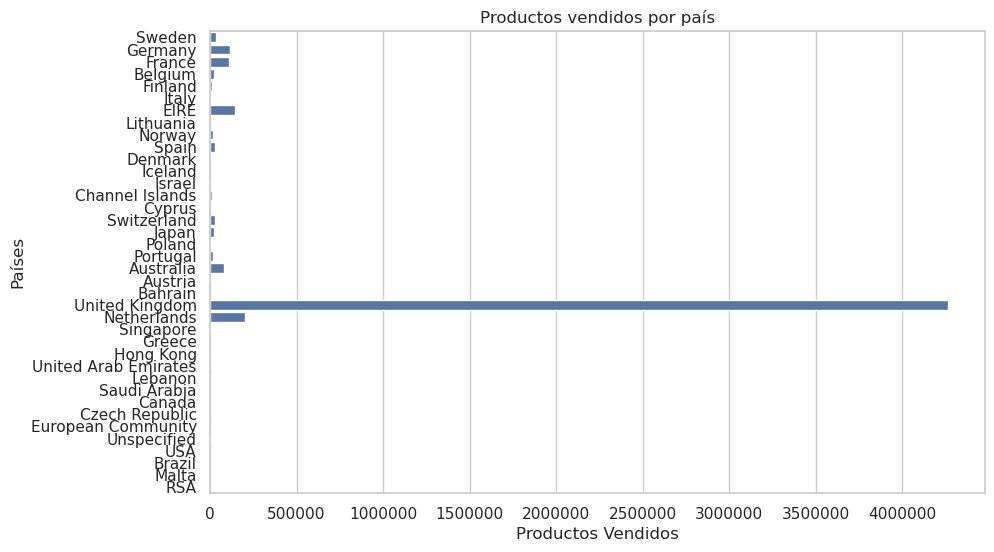

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style="plain")
sns.set_theme(style="whitegrid")
sns.barplot(x="sum(Quantity)", y="Country", data=df2_pandas).set_title("Productos vendidos por país")
plt.xlabel("Productos Vendidos")
plt.ylabel("Países")

plt.show()